In [1]:
# file dall'anno 2008 al 2018
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile

file = []
#file.append("D:/Bets/eurodata/all-euro-data-2008-2009.xls")
#file.append("D:/Bets/eurodata/all-euro-data-2009-2010.xls")
#file.append("D:/Bets/eurodata/all-euro-data-2010-2011.xls")
#file.append("D:/Bets/eurodata/all-euro-data-2011-2012.xls")
#file.append("D:/Bets/eurodata/all-euro-data-2012-2013.xls")
#file.append("D:/Bets/eurodata/all-euro-data-2013-2014.xls")
#file.append("D:/Bets/eurodata/all-euro-data-2014-2015.xls")
#file.append("D:/Bets/eurodata/all-euro-data-2015-2016.xls")
file.append("D:/Bets/eurodata/all-euro-data-2016-2017.xls")
file.append("D:/Bets/eurodata/all-euro-data-2017-2018.xlsx")
file.append("D:/Bets/eurodata/all-euro-data-2018-2019.xlsx")

In [2]:
# dati di 7 bookmakers presenti in ogni anno
df = pd.DataFrame(index=[],columns=[])

for i in range (0,len(file)):
    xls = pd.ExcelFile(file[i])
    for sheet_count in range(0,22):
        df = df.append(pd.read_excel(xls, sheet_name = sheet_count, usecols = ['HomeTeam', 'AwayTeam', 'FTR',
                                                                               'B365H', 'B365D', 'B365A', 
                                                                               'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 
                                                                               'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA',
                                                                              'PSH', 'PSD', 'PSA', 'PSCH', 'PSCD', 'PSCA']))

In [3]:
df['FTR'] = df['FTR'].replace('H',0)
df['FTR'] = df['FTR'].replace('D',1)
df['FTR'] = df['FTR'].replace('A',2)

In [4]:
# cancello le righe con elementi vuoti
df = df.dropna()

In [5]:
target = pd.DataFrame(index=[],columns=[])
target = target.append(df[['FTR']])
target = target.reset_index()

In [6]:
train_df = df.drop(['HomeTeam', 'AwayTeam', 'FTR'],axis=1)
train_df = train_df.reset_index()

In [7]:
target = target.drop(['index'],axis=1)
train_df = train_df.drop(['index'],axis=1)

In [8]:
# normalizzo il training dataset
from sklearn import preprocessing
norm_train = preprocessing.normalize(train_df)
norm_train = norm_train.astype('float')
norm_train_df = pd.DataFrame(norm_train, columns = train_df.columns)

In [12]:
#provo a ottenere stime percentuali
from sklearn import model_selection
from sklearn.svm import SVC
name = 'svm'
results = []
scoring = 'accuracy'
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
est_model = SVC(kernel = 'rbf', gamma = 'scale', shrinking = True, probability = True, class_weight = 'balanced', 
            decision_function_shape = 'ovo')
cv_results = model_selection.cross_val_score(est_model, norm_train_df, target, cv=kfold, scoring=scoring)
results.append(cv_results)
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

C:\Users\Francesco\Miniconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Francesco\Miniconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Francesco\Miniconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Francesco\Miniconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

svm: 0.464276 (0.020076)


In [14]:
est_model.fit(norm_train_df,target)

C:\Users\Francesco\Miniconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
# creo il dataframe su cui fare predizioni

df_p = pd.DataFrame(index=[],columns=[])

file_p = []
file_p.append("D:/Bets/eurodata/all-euro-data-2019-2020.xlsx")

xls_p = pd.ExcelFile(file_p[0])
for sheet_count in range(0,22):
    df_p = df_p.append(pd.read_excel(xls_p, sheet_name = sheet_count, usecols = ['HomeTeam', 'AwayTeam','FTR', 'B365H', 'B365D', 'B365A', 
                                                                                'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 
                                                                                'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA',
                                                                               'PSH', 'PSD', 'PSA', 'PSCH', 'PSCD', 'PSCA']))

In [16]:
df_p['FTR'] = df_p['FTR'].replace('H',0)
df_p['FTR'] = df_p['FTR'].replace('D',1)
df_p['FTR'] = df_p['FTR'].replace('A',2)

In [17]:
df_p = df_p.dropna()
df_p

,HomeTeam,AwayTeam,FTR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,...,PSA,WHH,WHD,WHA,VCH,VCD,VCA,PSCH,PSCD,PSCA
0,Liverpool,Norwich,0,1.14,10.00,19.00,1.14,8.25,18.50,1.15,...,18.05,1.12,8.5,21.00,1.14,9.50,23.00,1.14,10.43,19.63
1,West Ham,Man City,2,12.00,6.50,1.22,11.50,5.75,1.26,11.00,...,1.26,13.00,6.0,1.24,12.00,6.50,1.25,11.11,6.68,1.27
2,Bournemouth,Sheffield United,1,1.95,3.60,3.60,1.95,3.60,3.90,1.97,...,3.90,2.00,3.5,3.80,2.00,3.60,4.00,1.98,3.67,4.06
3,Burnley,Southampton,0,2.62,3.20,2.75,2.65,3.20,2.75,2.65,...,2.81,2.70,3.2,2.75,2.70,3.30,2.80,2.71,3.19,2.90
4,Crystal Palace,Everton,1,3.00,3.25,2.37,3.20,3.20,2.35,3.10,...,2.39,3.10,3.3,2.35,3.20,3.30,2.45,3.37,3.45,2.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,OFI Crete,AEK,0,3.10,3.40,2.25,3.30,3.10,2.35,3.15,...,2.37,3.10,3.2,2.30,3.00,3.25,2.25,3.15,3.18,2.39
80,Panathinaikos,Asteras Tripolis,0,1.60,3.60,6.00,1.62,3.75,6.00,1.63,...,6.58,1.57,3.6,6.50,1.60,3.50,6.00,1.51,3.90,7.19
81,Aris,Lamia,1,1.33,4.50,11.00,1.35,4.75,10.50,1.37,...,12.16,1.33,4.5,10.00,1.33,4.33,10.00,1.35,4.27,11.43
82,Xanthi,Atromitos,0,2.75,3.10,2.62,2.80,3.00,2.75,2.80,...,2.72,2.88,2.9,2.62,2.75,3.00,2.60,3.07,2.96,2.59


In [18]:
# salvo in un dataframe a singola colonna i risultati per confrontarli con quelli predetti

target_p = pd.DataFrame(index=[],columns=[])
target_p = target_p.append(df_p[['FTR']])
target_p = target_p.reset_index()
target_p

,index,FTR
0,0,0
1,1,2
2,2,1
3,3,0
4,4,1
...,...,...
3135,79,0
3136,80,0
3137,81,1
3138,82,0


In [19]:
ndf_p = df_p.drop(['HomeTeam','AwayTeam','FTR'],axis=1)
ndf_p = ndf_p.reset_index()

In [20]:
target_p = target_p.drop(['index'],axis = 1)
ndf_p = ndf_p.drop(['index'],axis = 1)

In [21]:
#normalizzo il set su cui faccio predizioni

norm_pred = preprocessing.normalize(ndf_p)
norm_pred = norm_pred.astype('float')
norm_pred_df = pd.DataFrame(norm_pred, columns = ndf_p.columns)

In [22]:
#stimo le percentuali di categorizzazione 

estim_perc = est_model.predict_proba(norm_pred_df)

In [25]:
#quote stimate
real_odds = 1 / est_model.predict_proba(norm_pred_df)

In [28]:
estdf_probability = pd.DataFrame(index = [], columns = [])
for i in range (len(estim_perc)):
    estdf_probability = estdf_probability.append([[estim_perc[i,0],estim_perc[i,1],estim_perc[i,2]]])

In [33]:
#creo l'array con le migliori quote disponibili
best_odds = pd.DataFrame(index = [], columns = [])

for i in range (len(estim_perc)):
    best_odds  = best_odds.append([[ndf_p.loc[[i],['B365H', 'BWH', 'IWH', 'PSH', 'WHH', 'VCH', 'PSCH']].values.max(),
                                  ndf_p.loc[[i],['B365D', 'BWD', 'IWD', 'PSD', 'WHD', 'VCD', 'PSCD']].values.max(),
                                  ndf_p.loc[[i],['B365A', 'BWA', 'IWA', 'PSA', 'WHA', 'VCA', 'PSCA']].values.max()]])

In [34]:
#converto le odds in probabilità

odds_probability = 1 / best_odds

In [36]:
# dataframe con la differenza tra percentuali "reali" calcolate dal network neurale e percentuale migliore offerta 
# dai nookmakers

value_df = estdf_probability - odds_probability

In [ ]:
# prendo il valore più alto per ogni riga di value_df
# se è >0.10 (ovvero la differenza tra percentuale reale e offerta è superiore al 10%) inserisco la partita nel dataframe
# delle scommesse da giocare. Recupero la quota migliore dal dataframe best_odds e le squadre da df_p

# creo il processo aleatorio, includendo il calcolo dinamico del kelly
# visualizzo i grafici delle v.a.
# visualizzo il grafico del valore atteso del processo aleatorio

In [38]:
value_df = value_df.reset_index()
value_df = value_df.drop(['index'],axis = 1)

In [45]:
estdf_probability = estdf_probability.reset_index()
estdf_probability = estdf_probability.drop(['index'],axis = 1)

In [68]:
best_odds = best_odds.reset_index()
best_odds = best_odds.drop(['index'],axis = 1)

In [73]:
df_p = df_p.reset_index()
df_p = df_p.drop(['index'],axis = 1)

In [98]:
# creo il dataframe con le partite da scommettere, prendendo le migliori quote 

bets = pd.DataFrame(index=[],columns=[])

i = 0
for i in range(len(estdf_probability)):
    #controllo se esiste un risultato con mismatch di valore >0.10
    if (value_df.loc[[i]].values.max() > 0.10):
        bets = bets.append([[df_p.loc[i,'HomeTeam'],
                             df_p.loc[i,'AwayTeam'],
                             value_df.loc[i].idxmax(axis=1),
                             value_df.loc[i].values.max(),
                             best_odds.loc[i,value_df.loc[i].idxmax(axis=1)],
                             estdf_probability.loc[i,value_df.loc[i].idxmax(axis=1)]]])
        
# 'HomeTeam','AwayTeam','Result','Value','Odds','Probability'

In [103]:
bets = bets.rename(columns={0: "HomeTeam", 1: "AwayTeam", 2: "Result", 3: "Value", 4: "Odds", 5: "Probability"}) 

In [105]:
bets = bets.reset_index()
bets = bets.drop(['index'],axis=1)

In [106]:
bets

,HomeTeam,AwayTeam,Result,Value,Odds,Probability
0,Liverpool,Norwich,1,0.116909,10.43,0.212787
1,West Ham,Man City,0,0.203179,13.00,0.280102
2,Southampton,Liverpool,0,0.151133,7.50,0.284466
3,Bournemouth,Man City,0,0.222368,17.00,0.281191
4,Man City,Brighton,1,0.136229,13.06,0.212798
...,...,...,...,...,...,...
278,AEK,Volos NFC,2,0.104758,17.59,0.161609
279,Volos NFC,PAOK,0,0.202662,12.64,0.281776
280,Xanthi,Olympiakos,0,0.190992,11.00,0.281901
281,Olympiakos,Atromitos,2,0.117161,26.91,0.154322


In [177]:
import numpy as np

bankroll = np.empty([100,len(bets)+1],dtype = float)

In [162]:
bankroll[0]

array([ 1.22077258e-315,  1.82442649e-315,  1.32316709e-318,
                    nan,  5.29239778e-260,  2.01737825e+088,
        9.49786763e-227, -1.72891646e-196,  8.22865375e+044,
        7.56970076e+173,  1.26208172e+122,  1.06561701e-255,
        1.37163403e-309,  1.84347044e+228,  1.13045200e+217,
        6.80648771e+199,  4.82337433e+228,  1.05133185e-153,
        8.60013889e+217,  6.80648771e+199,  4.29827994e+183,
        9.22355218e+020,  4.03329571e+291, -1.83611733e+090,
        1.05259839e-288, -6.01241109e+027,  3.45149392e+222,
        4.23983388e+132, -8.53779360e-262, -5.68108971e-061,
       -1.16593237e+003,  3.51060897e-292,  5.78548015e-242,
       -5.76053528e+208,  2.01406187e+206,  1.45350993e-155,
        1.78055834e+229,  9.12462140e-069,  2.90435504e-144,
        1.65714610e-196,  2.90435521e-144,  2.90435521e-144,
       -1.48608547e-267,  1.06977471e-084,  6.33171346e-250,
       -1.48603974e-267,  2.90483888e-144, -1.26832233e+088,
       -1.65831547e-196,

In [178]:
#set starting point at 1000€ for all random variables

bankroll[:,0] = 100

In [179]:
betresult = np.empty([100,len(bets)],dtype = float)
betsize = np.empty([100,len(bets)],dtype = float)
betlimit = 10000
i = 0
j = 0
for i in range (100):
    
    for j in range (len(bets)):
        # devo calcolare il kelly di volta in volta
        kelly = [(bets.loc[i,'Odds'] - 1) * (bets.loc[i,'Probability']) - (1 - bets.loc[i,'Probability'])] / (bets.loc[i,'Odds'] - 1)
        
        betsize[i,j] = bankroll[i,j] * kelly
        #inserisco il limite di importo scommettibile
        if(betsize[i,j] > betlimit):
            betsize[i,j] = betlimit
    
        # devo usare la percentuale "reale"
        betresult[i,j] = np.random.choice([0,1],p = [(1 - bets.loc[i,'Probability']),bets.loc[i,'Probability']])
        if(betresult[i,j] == 0):
            bankroll[i,j+1] = bankroll[i,j] - betsize[i,j]
        if(betresult[i,j] == 1):
            bankroll[i,j+1] = bankroll[i,j] + betsize[i,j] * (bets.loc[i,'Odds'] - 1)

In [180]:
bankroll[9,283]

4343532.596225165

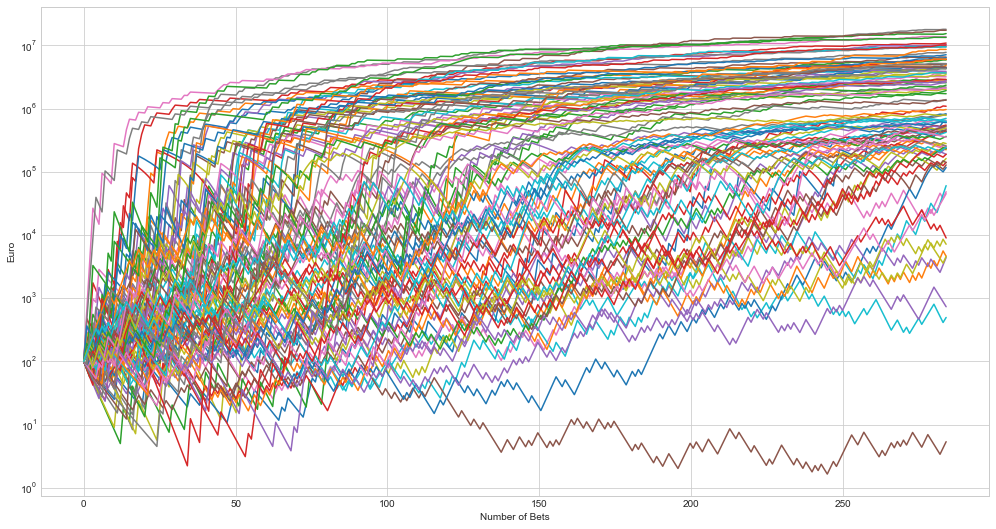

In [181]:
#scala logaritmica sull'asse y

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=[17,9])
ax = plt.axes()
ax.set_ylabel('Euro')
ax.set_xlabel('Number of Bets')
ax.semilogy()
for i in range(100):
    x = np.linspace(0,len(bets)+1,num = (len(bets)+1))
    ax.plot(x,bankroll[i])

In [182]:
# expected value function

Eval = bankroll.mean(0)

In [183]:
Variance = bankroll.var(0)

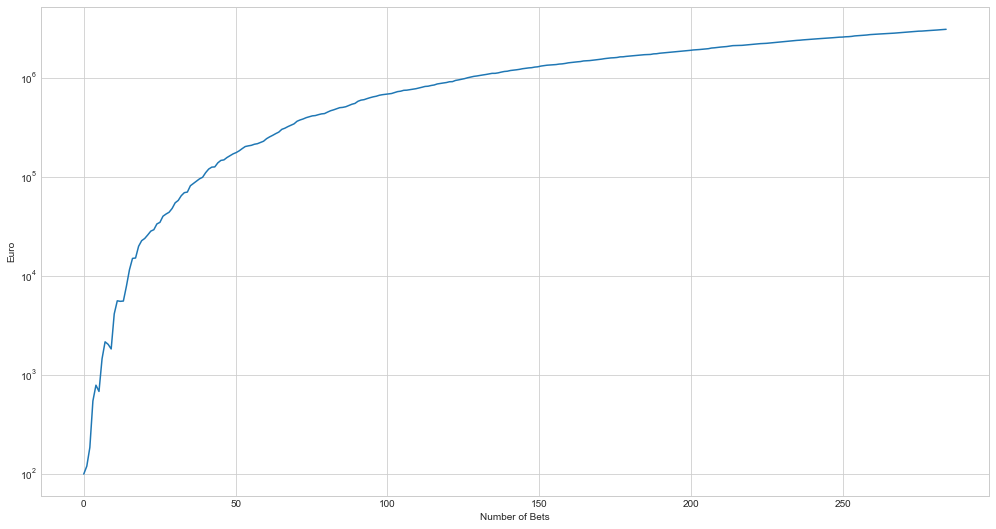

In [184]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=[17,9])
ax = plt.axes()
ax.set_ylabel('Euro')
ax.set_xlabel('Number of Bets')
ax.semilogy()
x = np.linspace(0,(len(bets)+1),num = (len(bets)+1))
ax.plot(x,Eval)

In [176]:
betsize[0]

array([  129.30687422,   112.5866065 ,    98.02838434,    85.35264037,
          74.31595724,    64.7063931 ,    56.33941167,    49.05433845,
          42.71127528,    37.18841378,    32.37969623,    28.19277893,
          24.54725881,    21.3731295 ,    18.60943693,    41.30111111,
          35.96059353,    31.31064159,    27.26196039,    23.73680151,
          52.68059857,   116.91741468,   101.79918925,    88.63585429,
         196.71520851,   436.58261738,   380.12948379,   330.97612844,
         734.55644604,   639.57324806,  1419.4457295 ,  1235.90163909,
        1076.09106129,   936.94508977,   815.79164889,   710.30418076,
         618.4569674 ,   538.4862301 ,   468.85625887,   408.22992158,
         906.0107198 ,   788.85730561,   686.85263321,   598.03786616,
         520.70745902,   453.37640511,  1006.20719212,   876.09768528,
        1944.37950895,  1692.95787234,  1474.04678167,  1283.44239988,
        1117.4844749 ,  2480.1046174 ,  2159.41004158,  1880.18347893,
      

In [198]:
check = bets

for i in range(len(check)):
    
    for j in range(len(df_p)):
        if(check.loc[i,'HomeTeam'] == df_p.loc[j,'HomeTeam'] and check.loc[i,'AwayTeam'] == df_p.loc[j,'AwayTeam']):
            check.loc[i,'Actual Result'] = df_p.loc[j,'FTR']

In [199]:
check

,HomeTeam,AwayTeam,Result,Value,Odds,Probability,Actual Result
0,Liverpool,Norwich,1,0.116909,10.43,0.212787,0.0
1,West Ham,Man City,0,0.203179,13.00,0.280102,2.0
2,Southampton,Liverpool,0,0.151133,7.50,0.284466,2.0
3,Bournemouth,Man City,0,0.222368,17.00,0.281191,2.0
4,Man City,Brighton,1,0.136229,13.06,0.212798,0.0
...,...,...,...,...,...,...,...
278,AEK,Volos NFC,2,0.104758,17.59,0.161609,0.0
279,Volos NFC,PAOK,0,0.202662,12.64,0.281776,2.0
280,Xanthi,Olympiakos,0,0.190992,11.00,0.281901,1.0
281,Olympiakos,Atromitos,2,0.117161,26.91,0.154322,0.0


In [200]:
for i in range(len(check)):
    if((check.loc[i,'Result'] - check.loc[i,'Actual Result']) == 0):
        #scommessa vinta
        check.loc[i,'Bet Result'] = 'W'
    else:
        #scommessa persa
        check.loc[i,'Bet Result'] = 'L'

In [203]:
check['Bet Result'].value_counts()

L    231
W     52
Name: Bet Result, dtype: int64

In [221]:
correct = 0
total_odds = 0

for i in range (len(check)):
    if(check.loc[i,'Bet Result'] == 'W'):
        total_odds = total_odds + check.loc[i,'Odds']
        correct = correct + 1


In [222]:
correct

52

In [223]:
total_odds

320.02000000000004

In [225]:
average_odds = total_odds / correct
average_odds

6.15423076923077

In [227]:
perc = correct / len(check)
perc

0.18374558303886926

In [229]:
perc * average_odds

1.1308127208480567

In [ ]:
# il ritorno sarebbe stato del 13% !!!

In [290]:
realsim_bank = np.empty([len(bets)+1],dtype = float)
start = 1000
realsim_bank[0] = start
hk_bank = np.empty([len(bets)+1],dtype = float)
hk_bank[0] = start

In [291]:
betRes = np.empty([len(bets)],dtype = float)
betSize = np.empty([len(bets)],dtype = float)
betLim = 10000
halfbetSize = np.empty([len(bets)],dtype = float)

i = 0

    
for i in range (len(bets)):
    # devo calcolare il kelly di volta in volta
    kelly = [(check.loc[i,'Odds'] - 1) * (check.loc[i,'Probability']) - (1 - check.loc[i,'Probability'])] / (check.loc[i,'Odds'] - 1)
    half_kelly = 0.5 * kelly
    if(realsim_bank[i] > 2 * start):
        kelly = half_kelly
    betSize[i] = realsim_bank[i] * kelly
    halfbetSize[i] = realsim_bank[i] * half_kelly
    #inserisco il limite di importo scommettibile
    if(betSize[i] > betLim):
        betSize[i] = betLim
    if(halfbetSize[i] > betLim):
        halfbetSize[i] = betLim
    
    # devo usare la percentuale "reale"
    betRes[i] = check.loc[i,'Actual Result']
    if(betRes[i] != check.loc[i,'Result']):
        realsim_bank[i+1] = realsim_bank[i] - betSize[i]
        hk_bank[i+1] = hk_bank[i] - halfbetSize[i]
    if(betRes[i] == check.loc[i,'Result']):
        realsim_bank[i+1] = realsim_bank[i] + betSize[i] * (check.loc[i,'Odds'] - 1)
        hk_bank[i+1] = hk_bank[i] - halfbetSize[i] * (check.loc[i,'Odds'] - 1)

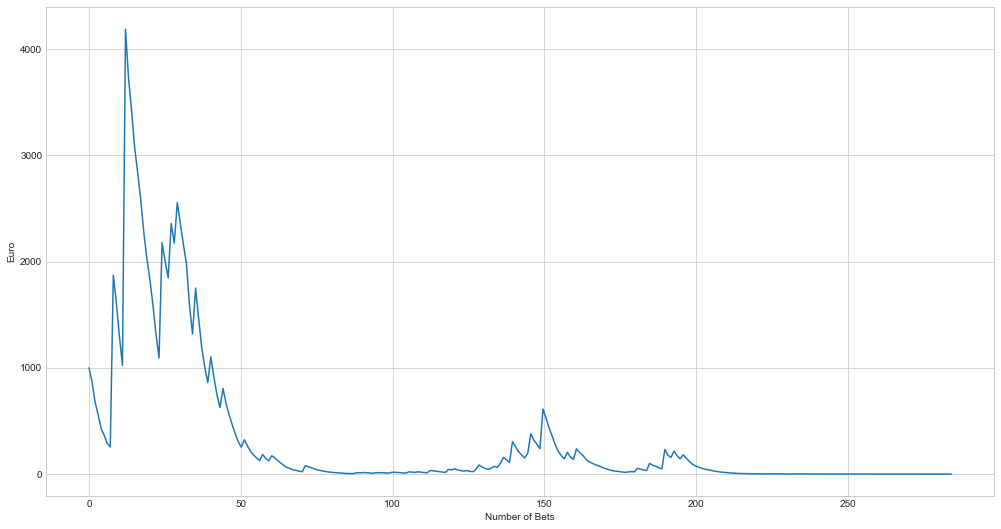

In [292]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=[17,9])
ax = plt.axes()
ax.set_ylabel('Euro')
ax.set_xlabel('Number of Bets')
x = np.linspace(0,len(check)+1,num = (len(check)+1))
ax.plot(x,realsim_bank)

In [289]:
realsim_bank

array([1.00000000e+03, 8.70693126e+02, 6.79044069e+02, 5.60629619e+02,
       4.28172138e+02, 3.65006302e+02, 2.88646034e+02, 2.55254258e+02,
       1.87162545e+03, 1.61168360e+03, 1.29404114e+03, 1.02402697e+03,
       4.18534711e+03, 3.26105258e+03, 2.72982777e+03, 2.17576975e+03,
       1.83848861e+03, 1.50792531e+03, 1.15071534e+03, 9.04869929e+02,
       7.24498405e+02, 6.30759104e+02, 5.20691426e+02, 4.32751571e+02,
       8.62336587e+02, 7.24729965e+02, 6.11571435e+02, 7.80937717e+02,
       6.58188199e+02, 8.90013782e+02, 7.52705172e+02, 6.26118934e+02,
       5.20744755e+02, 4.16986290e+02, 3.47155436e+02, 4.60779316e+02,
       3.85229793e+02, 3.14572509e+02, 2.64942690e+02, 2.26907183e+02,
       2.90157271e+02, 2.39608534e+02, 1.97117335e+02, 1.64684759e+02,
       2.11971139e+02, 1.74780087e+02, 1.46975701e+02, 1.22701283e+02,
       1.00359004e+02, 7.96650295e+01, 6.64252586e+01, 8.49503556e+01,
       7.00580554e+01, 5.69620246e+01, 4.73549362e+01, 4.03431635e+01,
      

In [ ]:
# la strategia porta a un guadagno ottimale per importi intorno ai 100k€
# per importi bassi (100,1000) si perde tutto il capitale
# per importi superiori si guadagna qualcosa, ma le percentuali rispetto al capitale investito sono basse

# provare a implementare una strategia mista: kelly fino a una certa cifra, half kelly dopo